Training Epoch： 01 loss=1.556918
Training Epoch： 02 loss=1.329772
Training Epoch： 03 loss=1.142953
Training Epoch： 04 loss=0.988990
Training Epoch： 05 loss=0.861816
Training Epoch： 06 loss=0.756506
Training Epoch： 07 loss=0.669059
Training Epoch： 08 loss=0.596226
Training Epoch： 09 loss=0.535362
Training Epoch： 10 loss=0.484320
Training Epoch： 11 loss=0.441349
Training Epoch： 12 loss=0.405025
Training Epoch： 13 loss=0.374186
Training Epoch： 14 loss=0.347884
Training Epoch： 15 loss=0.325347
Training Epoch： 16 loss=0.305940
Training Epoch： 17 loss=0.289147
Training Epoch： 18 loss=0.274543
Training Epoch： 19 loss=0.261778
Training Epoch： 20 loss=0.250566
Training Epoch： 21 loss=0.240670
Training Epoch： 22 loss=0.231894
Training Epoch： 23 loss=0.224077
Training Epoch： 24 loss=0.217084
Training Epoch： 25 loss=0.210801
Training Epoch： 26 loss=0.205137
Training Epoch： 27 loss=0.200011
Training Epoch： 28 loss=0.195357
Training Epoch： 29 loss=0.191119
Training Epoch： 30 loss=0.187250
Training E

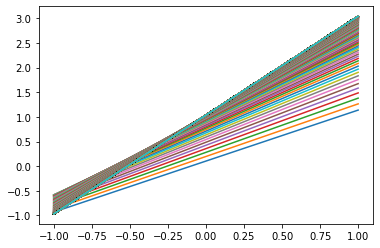

2.005287 1.0366181


In [5]:
#在Jupyter中，使用matplotlib显示图像需要设置为inline模式，否则不会显示图像
%matplotlib inline

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# 设置随机数种子
np.random.seed(5)

# 直接采用np生成等差数列的方法，生成100个点，每个点的取值在-1~1之间

x_data = np.linspace(-1,1,100)

# y=2x+1 +噪声 其中噪声的维度与x_data一致

y_data = 2 * x_data + 1.0 + np.random.randn(*x_data.shape) * 0.4

def model(x,w,b):
    return tf.multiply(x,w) + b

def loss(x,y,w,b):
    err = model(x,w,b) - y   #计算模型预测值和标签值的差异
    squared_err = tf.square(err)  #求平方，得出方差
    return tf.reduce_mean(squared_err)  #求均值,得出均方差

def grad(x,y,w,b):
    with tf.GradientTape() as tape:
        loss_ = loss(x,y,w,b)
    return tape.gradient(loss_,[w,b])   # 返回梯度向量
# 构建线性函数的斜率，变量w
w = tf.Variable(1.0,tf.float32)
# 构建线性函数的截距，变量b
b = tf.Variable(0.0,tf.float32)

training_epochs = 100  # 迭代次数(训练轮数)
learning_rate = 0.05  # 学习率

loss_list = []  #用于保存loss值的列表

for epoch in range(training_epochs*10):
    loss_ = loss(x_data,y_data,w, b)   #计算损失
    loss_list.append(loss_)    #保存本次损失计算结果
        
    delta_w,delta_b = grad(x_data,y_data,w,b)   #计算当前[w,b]点的梯度
    change_w = delta_w * learning_rate  #计算变量w需要改变的量
    change_b = delta_b * learning_rate  #计算变量b需要改变的量
    w.assign_sub(change_w)              #变量w值变更为减去change_w后的值
    b.assign_sub(change_b)              #变量b值变更为减去change_w后的值
    
    print("Training Epoch：",'%02d'%(epoch+1),"loss=%.6f"%(loss_))
    plt.plot(x_data,w.numpy() * x_data + b.numpy())    # 完成一轮训练后，画出图像
plt.show()
print(w.numpy(),b.numpy())